In [1]:
%matplotlib inline
import math, sys, os, numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3,3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x):
    return a*x+b

a = 3
b = 8

n = 30
x = random(n)
y = lin(a,b,x)

In [3]:
print(x)

[ 0.0676  0.5521  0.4907  0.1179  0.0958  0.2261  0.0298  0.4497  0.5418  0.8474  0.2436  0.3222
  0.4976  0.7129  0.9261  0.5667  0.4884  0.523   0.9624  0.6353  0.1493  0.9232  0.2989  0.4108
  0.193   0.9638  0.1379  0.6562  0.471   0.3061]


In [4]:
print(y)

[  8.2028   9.6564   9.472    8.3536   8.2875   8.6784   8.0894   9.349    9.6255  10.5423   8.7309
   8.9667   9.4927  10.1386  10.7782   9.7002   9.4651   9.569   10.8872   9.906    8.4478  10.7697
   8.8966   9.2324   8.5789  10.8915   8.4136   9.9686   9.4129   8.9184]


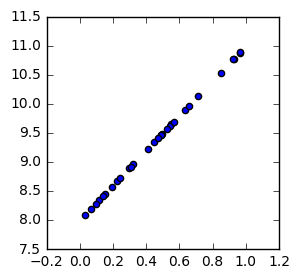

In [5]:
plt.scatter(x,y)

In [6]:
def sse(y, y_pred):
    return((y-y_pred)**2).sum()

def loss(y,a,b,x):
    return sse(y, lin(a,b,x))

def avg_loss(y,a,b,x):
    return np.sqrt(loss(y, a, b, x)/n)

In [7]:
a_guess = -1.
b_guess = 1.
avg_loss(y, a_guess, b_guess, x)

8.9097

In [8]:
lr = 0.01

# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [9]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x * dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [10]:
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x, lin(a_guess, b_guess, x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess, b_guess, x))
    for i in range(10):
        upd()
        return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0,40), interval=100)
ani